<br><br><br>
# <center><b style="color:#E25033;"><u>Image retrieval - Practical lab
</u></b></center>


<b> Réalisé par :</b>

Menacer Nasreddine


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2
from os import listdir
import math
import os
import sys
import glob
import statistics

<br><br><b><font size="+2" style="color:#E25033;"><u>1-Telechargement de la base SmallHolidays   </u> </font></b> 

On dispose d'un jeu de données  Holidays qui contient un ensemble d'images contenant principalement des photos de vacances personnelles. Le jeu de données contient 1491 images au total: 500 requêtes et 991 images correspondantes ( résultats)

<b>Lecture des images :</b> 

In [4]:
############### lecture des images #####################
image_name = []
image=[]
image_name = listdir('smallholidays')

for i in range (len(image_name)):   
    a = 'smallholidays/' + listdir('smallholidays')[i]
    image.append(io.imread(a))

<b>Séparation des images en images requetes et images résultats :</b> 

In [5]:
image_requets = []
image_requets_name=[]

############### lecture des images request  #####################
image_requets_name=[name for name in image_name if name.endswith("00.jpg")]
for i in range (len(image_requets_name)):   
    image_requets.append(io.imread('smallholidays/'+image_requets_name[i]))


image_results = []
image_results_name=[]

############### lecture des images resuultats  #####################
    
image_results_name=[name for name in image_name if not name.endswith("00.jpg")]
      #image_requets.append(io.imread(a))
for i in range (len(image_results_name)):   
    image_results.append(io.imread('smallholidays/'+image_results_name[i]))


<br><br><b><font size="+2" style="color:#E25033;"><u>2-Implementation d'un systeme basic d'image retrieval  </u> </font></b> 

In [7]:
vector_image_requets = []

for i in range (len(image_requets)):     
    resized_image_requets = cv2.resize(image_requets[i], (16, 16))
    vector_image_requets.append(resized_image_requets.flatten())

vector_image_results= []

for i in range (len(image_results)):     
    resized_image_results = cv2.resize(image_results[i], (16, 16))
    vector_image_results.append(resized_image_results.flatten())    

Pour redimensioner les images j'ai pas précisé l'argument dans la fonction cv2.resise donc une interpolation bilineaire est utilisée par default 

Il est plus facile et moins couteu en temps et en espace memoire de comparer les images avec une dimension réduite que de le faire avec des images de dimension plus élevée.

<b> Calcule de similarité entre une image requete et les 991 image correspondante en utilisant la distance euclidiene </b>

In [7]:
Q=int(input("quelle est l'image requête : "))

quelle est l'image requête : 380


In [8]:
tab = [] # liste des distance euclidiènnees 
for i in range (len(vector_image_results)):
    tab.append(np.linalg.norm(vector_image_requets[Q] - vector_image_results[i]))


In [9]:
len(tab)

991

<b> Affichage des 10 images les plus pertinentes classées de la plus pertinente à la moinns pertinente  </b>

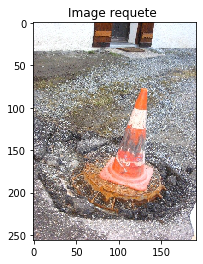

Image pertinente de rang 0


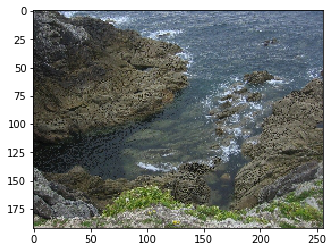

Image pertinente de rang 1


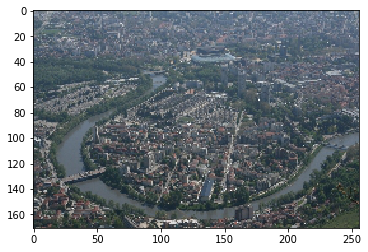

Image pertinente de rang 2


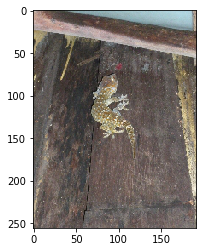

Image pertinente de rang 3


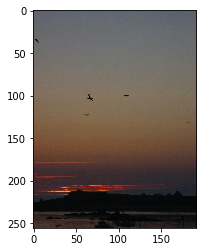

Image pertinente de rang 4


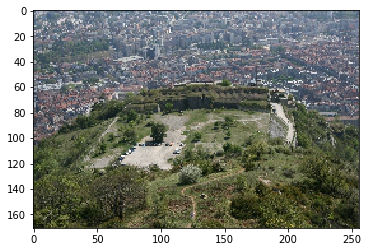

Image pertinente de rang 5


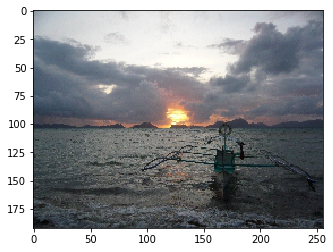

Image pertinente de rang 6


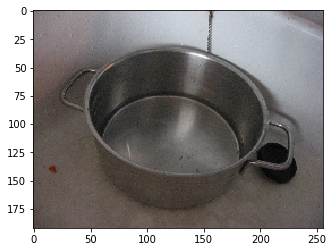

Image pertinente de rang 7


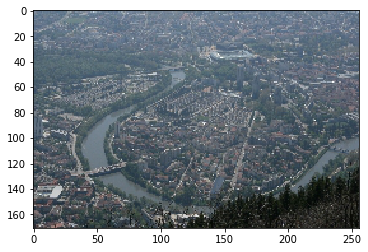

Image pertinente de rang 8


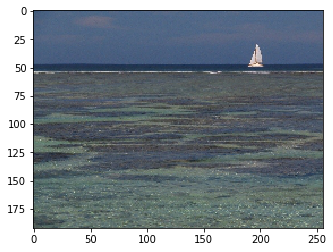

Image pertinente de rang 9


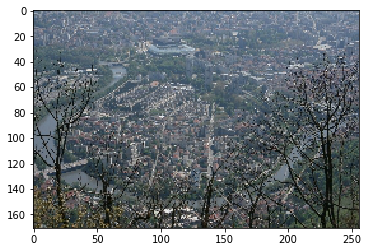

In [10]:
################ determiner les 10 plus pertinentes ##########################   
indices = sorted(range(len(tab)), key=lambda k: tab[k])[0:10]

plt.imshow(image_requets[Q])
plt.title('Image requete ')
plt.show()

for y in range (len(indices)):
    plt.imshow(image_results[indices[y]])
    print('Image pertinente de rang',y)
    plt.show()
    

on remarque que les images retrouvées ne ressemblent pas vraiment a notre image requete cela est normal car notre systeme d'image retrieval est tres natif

In [11]:
indices = sorted(range(len(tab)), key=lambda k: tab[k])[0:991]

In [12]:
#im=image_requets_name[0][0:4]
image_pertinantes_name=[name for name in image_results_name if name.startswith(image_requets_name[Q][0:4])]
indice_image_pertinante=[]
for i in range(len(image_pertinantes_name)):
    indice_image_pertinante.append(image_results_name.index(image_pertinantes_name[i]))

In [13]:
print('le nom de limage requete est :',image_requets_name[Q])
print('le nombre dimage pertinantes a cette requete est :',len(image_pertinantes_name))
image_pertinantes_name

le nom de limage requete est : 138000.jpg
le nombre dimage pertinantes a cette requete est : 12


['138001.jpg',
 '138002.jpg',
 '138003.jpg',
 '138004.jpg',
 '138005.jpg',
 '138006.jpg',
 '138007.jpg',
 '138008.jpg',
 '138009.jpg',
 '138010.jpg',
 '138011.jpg',
 '138012.jpg']

In [14]:
resultat=[]
for b in range(len(indices)):
        if indices[b] in indice_image_pertinante:
           resultat.append(1)
        else:
           resultat.append(0)

In [15]:
resultat

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [14]:
def recall(l):
    recall = []
    r = 0
    y=0
    x=l.count(1)
    for i in range(len(l)):
        if (l[i] == 0):
            recall.append(r)
        else:
            y+=1
            r = (y) / x
            recall.append(r)
    return recall

rec=[]
rec=recall(resultat)

In [17]:
rec

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333

In [15]:
def precision(l):
    precision = []
    t = 0
    pert = 0
    for i in range(len(l)):
        t += 1
        #print(t)
        if (l[i] == 1):
            pert += 1    
        s = pert / t
        precision.append(s)
    
    return precision



precis=[]
precis=precision(resultat)

In [19]:
precis

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.034482758620689655,
 0.03333333333333333,
 0.03225806451612903,
 0.03125,
 0.030303030303030304,
 0.029411764705882353,
 0.02857142857142857,
 0.027777777777777776,
 0.02702702702702703,
 0.02631578947368421,
 0.02564102564102564,
 0.025,
 0.024390243902439025,
 0.023809523809523808,
 0.023255813953488372,
 0.022727272727272728,
 0.022222222222222223,
 0.021739130434782608,
 0.02127659574468085,
 0.020833333333333332,
 0.02040816326530612,
 0.02,
 0.0196078431372549,
 0.019230769230769232,
 0.018867924528301886,
 0.018518518518518517,
 0.01818181818181818,
 0.017857142857142856,
 0.017543859649122806,
 0.017241379310344827,
 0.01694915254237288,
 0.016666666666666666,
 0.01639344262295082,
 0.016129032258064516,
 0.015873015873015872,
 0.015625,
 0.015384615384615385,
 0.015151515151515152,
 0.014925373134328358,
 0.0

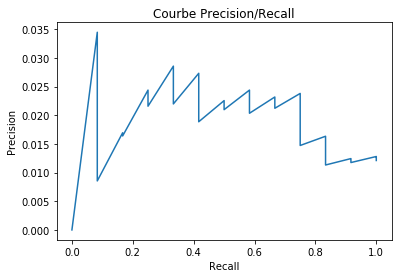

In [20]:
plt.plot(rec, precis) 
plt.title('Courbe Precision/Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

 <br><br><b><font size="+2" style="color:#E25033;"><u>3-Evaluation global sur les 500 images requetes </u> </font></b> 

In [8]:
tab_2 = np.zeros((500,991))
for j in range(len(vector_image_requets)):
    for i in range (len(vector_image_results)):
        tab_2[j][i]=(np.linalg.norm(vector_image_requets[j] - vector_image_results[i]))



In [9]:
# indices_500 contient les indices des images resultantes pour chacune des 500 requetes retournées pas le système
indices_500=[]
for u in range(500):
    indices_500.append(sorted(range(len(tab_2[u])), key=lambda k: tab_2[u][k])[0:991])

In [10]:
image_pertinantes_name_500=[]
for d in range(len(image_requets_name)): 
        image_pertinantes_name_500.append([name for name in image_results_name if name.startswith(image_requets_name[d][0:4])])



In [11]:
indice_image_pertinante_500=[]#[[]] * 500 
for o in range(len(image_pertinantes_name_500)):
    temp=[]
    for r in range(len(image_pertinantes_name_500[o])):
        temp.append(image_results_name.index(image_pertinantes_name_500[o][r]))
    #for f in range(len(image_pertinantes_name_500[r])):
    indice_image_pertinante_500.append(temp)


In [12]:
resultat_500=[]
for a in range(len(indices_500)):
    z=[]
    for b in indices_500[a]:
        #for c in indice_image_pertinante_500[a]:
            if b in indice_image_pertinante_500[a]:
               z.append(1)
            else:
               z.append(0)
    resultat_500.append(z)

In [16]:
rec=[]
for i in range(len(resultat_500)):
    rec.append(recall(resultat_500[i]))

In [17]:
precis=[]
for i in range(len(resultat_500)):
    precis.append(precision(resultat_500[i]))

In [18]:
my_result=[]
for a in range(len(indices_500)):
    z=[]
    for b in indices_500[a]:
                z.append(image_results_name[b])
           
    my_result.append(z) 

In [29]:
Average_P=[]
for i in range(len(resultat_500)):
    e=[]
    for j in range(len(resultat_500[i])):
        if resultat_500[i][j]==1:
            e.append(precis[i][j])
    Average_P.append(e)

In [30]:
tetetet=[]    
for h in range(len(Average_P)):
    tetetet.append(statistics.mean(Average_P[h]))
    

mAP=statistics.mean(tetetet)

print('le mean avergae precision =',mAP*100,'%')


le mean avergae precision = 2.7939939226792214 %


In [ ]:
file = open('result_nasro.dat','w')
for i in range(len(my_result)):
    file.write(image_results_name[i]+ " " + str(0)+ '\n')
    #file.write(" "+str(j))
for i in range(len(my_result)):
    file.write(str(0)+ '\n')


dicto = {image_requets_name[0] :str(1)}
file = open('list.dat','w')
file.write( str(dicto))
file.close()    

 <br><br><b><font size="+2" style="color:#E25033;"><u>4-Improving the image descriptors and similarity metrics </u> </font></b> 

In [35]:
import skimage.feature as ft
from skimage import data, color, exposure
from skimage.color import rgb2gray
import scipy as sc

## Cosine distance

In [36]:
def compare_with_cosine_distance(query_image,image):
    return sc.spatial.distance.cosine(query_image.flatten(),image.flatten())

## LBP

In [37]:
vector_image_requets_LBP= []

for i in range (len(image_requets)):  
    rgb_images=rgb2gray(image_requets[i])
    vector_image_requets_LBP.append(ft.local_binary_pattern(rgb_images, 8, 3, 'uniform'))
   
vector_image_results_LBP= []

for i in range (len(image_results)):  
    rgb_images_r=rgb2gray(image_results[i])
    vector_image_results_LBP.append(ft.local_binary_pattern(rgb_images_r, 8, 3, 'uniform'))

In [38]:
import numpy

vector_image_requets_LBP_pad=[]   
for i in range(len(vector_image_requets_LBP)):
    e=[]
    #for j in range((vector_image_requets_HOG_pad[i])):
    e=numpy.append( vector_image_requets_LBP[i].flatten() , np.zeros(49152-len(vector_image_requets_LBP[i].flatten())) )
    vector_image_requets_LBP_pad.append(e)    


In [39]:
import numpy

vector_image_results_LBP_pad=[]   
for i in range(len(vector_image_results_LBP)):
    e=[]
    #for j in range((vector_image_requets_HOG_pad[i])):
    e=numpy.append( vector_image_results_LBP[i].flatten() , np.zeros(49152-len(vector_image_results_LBP[i].flatten())) )
    vector_image_results_LBP_pad.append(e)    


In [48]:
cosin_LBP = np.zeros((500,991))
for j in range(len(vector_image_requets_LBP_pad)):
    for i in range (len(vector_image_results_LBP_pad)):
        cosin_LBP[j][i]=compare_with_cosine_distance(vector_image_requets_LBP_pad[j].flatten(),vector_image_results_LBP_pad[i].flatten())


In [ ]:
indices_LBP=[]
for u in range(500):
    indices_LBP.append(sorted(range(len(cosin_LBP[u])), key=lambda k: cosin_LBP[u][k])[0:991])

In [50]:
resultat_LBP=[]
for a in range(len(indices_LBP)):
    z=[]
    for b in indices_LBP[a]:
        #for c in indice_image_pertinante_500[a]:
            if b in indice_image_pertinante_500[a]:
               z.append(1)
            else:
               z.append(0)
    resultat_LBP.append(z)

In [51]:
my_result_LBP=[]
for a in range(len(indices_LBP)):
    z=[]
    for b in indices_LBP[a]:
        #for c in indice_image_pertinante_500[a]:
                z.append(image_results_name[b])
           
    my_result_LBP.append(z) 

In [53]:
rec_LBP=[]
for i in range(len(resultat_LBP)):
    rec_LBP.append(recall(resultat_LBP[i]))

precis_LBP=[]
for i in range(len(resultat_LBP)):
    precis_LBP.append(precision(resultat_LBP[i]))
    
    
temp=[]
for i in range(len(resultat_LBP)):
    e=[]
    for j in range(len(resultat_LBP[i])):
        if resultat_LBP[i][j]==1:
            e.append(precis_LBP[i][j])
    temp.append(e)


Average_P_LBP=[]    
for h in range(len(temp)):
    Average_P_LBP.append(statistics.mean(temp[h]))
    

mAP=statistics.mean(Average_P_LBP)
print('the mean avergae precision de LBP =',mAP*100,'%')   
    

the mean avergae precision de LBP = 1.5903759511960385 %


## HOG

In [33]:
from skimage.feature import hog

vector_image_requets_HOG= []

for i in range (len(image_requets)):  
    HOG=0
    HOG,_ = (hog(image_requets[i], orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True))
    vector_image_requets_HOG.append(HOG)
    

vector_image_results_HOG= []

for i in range (len(image_results)):  
    HOG=0
    HOG,_ = (hog(image_results[i], orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True))
    vector_image_results_HOG.append(HOG)

In [34]:
import numpy

vector_image_requets_HOG_pad=[]   
for i in range(len(vector_image_requets_HOG)):
    e=[]
    #for j in range((vector_image_requets_HOG_pad[i])):
    e=numpy.append( vector_image_requets_HOG[i] , np.zeros(25668-len(vector_image_requets_HOG[i])) )
    vector_image_requets_HOG_pad.append(e)    


In [35]:
vector_image_results_HOG_pad=[]   

for i in range(len(vector_image_results_HOG)):
    e=[]
    #for j in range((vector_image_requets_HOG_pad[i])):
    e=numpy.append( vector_image_results_HOG[i] , np.zeros(25668-len(vector_image_results_HOG[i])) )
    vector_image_results_HOG_pad.append(e)  


In [36]:
cosin_HOG = []
for j in range(len(vector_image_requets_HOG_pad)):
    e=[]
    for i in range (len(vector_image_results_HOG_pad)):
        e.append(sc.spatial.distance.cosine(vector_image_requets_HOG_pad[j],vector_image_results_HOG_pad[i]))
    cosin_HOG.append(e)

In [37]:
indices_HOG=[]
for u in range(500):
    indices_HOG.append(sorted(range(len(cosin_HOG[u])), key=lambda k: cosin_HOG[u][k])[0:991])

In [38]:
resultat_HOG=[]
for a in range(len(indices_HOG)):
    z=[]
    for b in indices_HOG[a]:
        #for c in indice_image_pertinante_500[a]:
            if b in indice_image_pertinante_500[a]:
               z.append(1)
            else:
               z.append(0)
    resultat_HOG.append(z)

In [39]:
my_result_HOG=[]
for a in range(len(indices_HOG)):
    z=[]
    for b in indices_HOG[a]:
        #for c in indice_image_pertinante_500[a]:
                z.append(image_results_name[b])
           
    my_result_HOG.append(z) 

In [40]:
rec_HOG=[]
for i in range(len(resultat_HOG)):
    rec_HOG.append(recall(resultat_HOG[i]))

precis_HOG=[]
for i in range(len(resultat_HOG)):
    precis_HOG.append(precision(resultat_HOG[i]))
    
temp=[]
for i in range(len(resultat_HOG)):
    e=[]
    for j in range(len(resultat_HOG[i])):
        if resultat_HOG[i][j]==1:
            e.append(precis_HOG[i][j])
    temp.append(e)


Average_P_HOG=[]    
for h in range(len(temp)):
    Average_P_HOG.append(statistics.mean(temp[h]))
    

mAP=statistics.mean(Average_P_HOG)
print('the mean avergae precision du HOG =',mAP*100,'%')

the mean avergae precision du HOG = 11.837070234564544 %


## Color Histogram

In [54]:
vector_image_requets_Hist= []

for i in range (len(image_requets)):  
    Hist=0
    Hist,_ = np.histogram(image_requets[i].ravel(),256,[0,256])
    vector_image_requets_Hist.append(Hist)
    
    
vector_image_results_Hist= []

for i in range (len(image_results)):  
    Hist=0
    Hist,_ = np.histogram(image_results[i].ravel(),256,[0,256])
    vector_image_results_Hist.append(Hist)
    

In [55]:
cosin_Hist = np.zeros((500,991))
for j in range(len(vector_image_requets_Hist)):
    for i in range (len(vector_image_results_Hist)):
        cosin_Hist[j][i]=compare_with_cosine_distance(vector_image_requets_Hist[j],vector_image_results_Hist[i])



In [56]:
indices_Hist=[]
for u in range(500):
    indices_Hist.append(sorted(range(len(cosin_Hist[u])), key=lambda k: cosin_Hist[u][k])[0:991])

In [57]:
resultat_Hist=[]
for a in range(len(indices_Hist)):
    z=[]
    for b in indices_Hist[a]:
        #for c in indice_image_pertinante_500[a]:
            if b in indice_image_pertinante_500[a]:
               z.append(1)
            else:
               z.append(0)
    resultat_Hist.append(z)

In [58]:
my_result_Hist=[]
for a in range(len(indices_Hist)):
    z=[]
    for b in indices_Hist[a]:
        #for c in indice_image_pertinante_500[a]:
                z.append(image_results_name[b])
           
    my_result_Hist.append(z) 

In [59]:
rec_Hist=[]
for i in range(len(resultat_Hist)):
    rec_Hist.append(recall(resultat_Hist[i]))

precis_Hist=[]
for i in range(len(resultat_Hist)):
    precis_Hist.append(precision(resultat_Hist[i]))
    
    
temp=[]
for i in range(len(resultat_Hist)):
    e=[]
    for j in range(len(resultat_Hist[i])):
        if resultat_Hist[i][j]==1:
            e.append(precis_Hist[i][j])
    temp.append(e)


Average_P_Hist=[]    
for h in range(len(temp)):
    Average_P_Hist.append(statistics.mean(temp[h]))
    

mAP=statistics.mean(Average_P_Hist)
print('the mean avergae precision du Hist =',mAP*100,'%')

the mean avergae precision du Hist = 23.42549484672444 %


<br><br><b><font size="+2" style="color:#E25033;"><u>5-Bag of Visual Words </u> </font></b> 

In [19]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
image_name = []
image1=[]
image_name = listdir('smallholidays')

for i in range (len(image_name)):   
    a = 'smallholidays/' + listdir('smallholidays')[i]
    image1.append(io.imread(a))


In [21]:
extractor = cv2.xfeatures2d.SIFT_create()

In [30]:
def features(image, extractor):
    descriptors = extractor.detectAndCompute(image, None)
    return  descriptors

In [23]:
patches=[]
patches_resize=[]
for i in range(len(image1)):
    patches.append(features(image1[i], extractor))
    

In [ ]:
patche_mod = [] 
for val in patches: 
    if val != None  : 
        resfg.append(val) 
  

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
for i in range(len(patches[0])):
    kmeans.fit(patche_mod[i].T)

In [ ]:
from skimage.color import rgb2gray
preprocessed_image = []
grayscale=[]
#for i in range(len(image1[0])):
grayscale.append(rgb2gray(image1[0]))
descriptor = features(grayscale[0], extractor)
    

In [ ]:
if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)   

In [ ]:
plt.bar(preprocessed_image)